In [56]:
import pandas as pd
from scipy.stats import qmc
import matplotlib.pyplot as plt
import jax
jax.config.update('jax_enable_x64', True)
import jax.numpy as jnp

from pathlib import Path

In [57]:
directory_path = Path.cwd()

In [81]:
# dataset_file_name = 'rubber_cb_vf_dataset.csv'
dataset_file_name = 'rubber_cb_vf_uniaxial_test.csv'
# dataset_file_name = 'rubber_cb_vf_shear_test.csv'


In [82]:
# Combine doe of different volume fractions
complete_doe = pd.DataFrame
# doe_file_list =['doe_vf40.csv',
#                 'doe_vf50.csv',
#                 'doe_vf20.csv',
#                 'doe_vf30.csv',
#                 'doe_vf10.csv']

doe_file_list = ['doe_uniaxial_test_vf40.csv',
                 'doe_uniaxial_test_vf50.csv',
                 'doe_uniaxial_test_vf20.csv',
                 'doe_uniaxial_test_vf30.csv',
                 'doe_uniaxial_test_vf10.csv']

# doe_file_list = ['doe_shear_test_vf40.csv',
#                  'doe_shear_test_vf50.csv',
#                  'doe_shear_test_vf20.csv',
#                  'doe_shear_test_vf30.csv',
#                  'doe_shear_test_vf10.csv']

volume_fraction = [0.406, 0.5023, 0.2018, 0.3001, 0.1074]

for i in range(len(doe_file_list)):
    df = pd.read_csv(directory_path / doe_file_list[i]).drop(columns=['Unnamed: 0'])
    df[['F11']] = df[['dU11']] + 1.0
    df[['F12']] = df[['dU12']]
    df[['F21']] = df[['dU21']]
    df[['F22']] = df[['dU22']] + 1.0
    df.drop(columns=['dU11', 'dU12', 'dU21', 'dU22'], inplace=True)
    
    if complete_doe.empty:
        df['vol_frac'] = volume_fraction[i]
        complete_doe = df
    else:
        df['vol_frac'] = volume_fraction[i]
        complete_doe = pd.concat([complete_doe, df])
complete_doe = complete_doe.reset_index(drop=True)

In [83]:
complete_doe

,F11,F12,F21,F22,vol_frac
0,0.6325,0.0,0.0,1.0,0.4060
1,0.7028,0.0,0.0,1.0,0.4060
2,0.7667,0.0,0.0,1.0,0.4060
3,0.8256,0.0,0.0,1.0,0.4060
4,0.8806,0.0,0.0,1.0,0.4060
...,...,...,...,...,...
245,2.1505,0.0,0.0,1.0,0.1074
246,2.1722,0.0,0.0,1.0,0.1074
247,2.1937,0.0,0.0,1.0,0.1074
248,2.2150,0.0,0.0,1.0,0.1074


In [84]:
complete_doe
def_grad_doe = complete_doe[['F11', 'F12', 'F21', 'F22']].values.reshape(-1, 2, 2)

In [85]:
# data_points_length = [16, 1024-16, 1024, 1024, 1024, 1024]
# volume_fraction = [0.406, 0.406, 0.5023, 0.2018, 0.3001, 0.1074 ]

# relative_path_to_output_folder = [Path('outputs/545843.hpc06.hpc/hyperelastic_data/'),
#                                   Path('outputs/545871.hpc06.hpc/hyperelastic_data/'),
#                                   Path('outputs/546022.hpc06.hpc/hyperelastic_data/'),
#                                   Path('outputs/546038.hpc06.hpc/hyperelastic_data/'),
#                                   Path('outputs/546180.hpc06.hpc/hyperelastic_data/'),
#                                   Path('outputs/546232.hpc06.hpc/hyperelastic_data/')] 

data_points_length = [50, 50, 50, 50, 50]
volume_fraction = [0.406, 0.5023, 0.2018, 0.3001, 0.1074 ]
#tension
relative_path_to_output_folder = [Path('outputs/545850.hpc06.hpc/hyperelastic_data/'),
                                  Path('outputs/546023.hpc06.hpc/hyperelastic_data/'),
                                  Path('outputs/546041.hpc06.hpc/hyperelastic_data/'),
                                  Path('outputs/546182.hpc06.hpc/hyperelastic_data/'),
                                  Path('outputs/546233.hpc06.hpc/hyperelastic_data/')]

                                  

#shear
# relative_path_to_output_folder = [Path('outputs/545851.hpc06.hpc/hyperelastic_data/'),
#                                   Path('outputs/546024.hpc06.hpc/hyperelastic_data/'),
#                                   Path('outputs/546040.hpc06.hpc/hyperelastic_data/'),
#                                   Path('outputs/546181.hpc06.hpc/hyperelastic_data/'),
#                                   Path('outputs/546234.hpc06.hpc/hyperelastic_data/')]

                                    
raw_data = pd.DataFrame(columns=['F11', 'F12', 'F21', 'F22', 'P11', 'P12', 'P21', 'P22', 'vol_frac'])
idx = 0
for j in range(len(relative_path_to_output_folder)):
    for i in range(data_points_length[j]):
        experiment_folder = directory_path/relative_path_to_output_folder[j]/Path('point_{}'.format(i))
        result_file = experiment_folder/ Path('results.p')    
        try:
            result = pd.read_pickle(result_file)

            F = result['deformation_gradient'][-1]
            P = result['pk1_stress'][-1]

            raw_data.loc[idx] = [F[0,0], F[0,1], F[1,0], F[1,1], P[0,0], P[0,1], P[1,0], P[1,1], volume_fraction[j]]
            idx += 1

        except:
            print(idx, "No data")
            raw_data.loc[idx] = [0.0]*8 + [volume_fraction[j]]
            idx += 1

In [86]:
complete_doe

,F11,F12,F21,F22,vol_frac
0,0.6325,0.0,0.0,1.0,0.4060
1,0.7028,0.0,0.0,1.0,0.4060
2,0.7667,0.0,0.0,1.0,0.4060
3,0.8256,0.0,0.0,1.0,0.4060
4,0.8806,0.0,0.0,1.0,0.4060
...,...,...,...,...,...
245,2.1505,0.0,0.0,1.0,0.1074
246,2.1722,0.0,0.0,1.0,0.1074
247,2.1937,0.0,0.0,1.0,0.1074
248,2.2150,0.0,0.0,1.0,0.1074


In [87]:
raw_data

,F11,F12,F21,F22,P11,P12,P21,P22,vol_frac
0,0.664637,-9.574330e-36,-6.931408e-36,1.0,-31.213980,0.651070,0.430076,-7.671208,0.4060
1,0.702800,-4.232997e-36,-3.313329e-36,1.0,-23.161179,0.290339,0.204053,-5.602766,0.4060
2,0.766700,-1.826194e-36,-1.595728e-36,1.0,-14.142593,0.128510,0.098529,-3.459054,0.4060
3,0.825600,-2.967045e-37,-3.137166e-37,1.0,-8.707150,0.022159,0.018294,-2.216827,0.4060
4,0.880600,-2.739832e-37,-2.858906e-37,1.0,-5.134109,0.019276,0.016971,-1.397419,0.4060
...,...,...,...,...,...,...,...,...,...
245,2.150500,3.170354e-37,6.366726e-37,1.0,12.814978,-0.018525,-0.039870,13.448703,0.1074
246,2.172200,4.832508e-37,1.006539e-36,1.0,12.986629,-0.028667,-0.062302,13.831450,0.1074
247,2.193700,3.210311e-37,6.516105e-37,1.0,13.215364,-0.018014,-0.039518,14.190446,0.1074
248,2.215000,2.998888e-37,6.574674e-37,1.0,13.308493,-0.017560,-0.038900,14.578341,0.1074


In [88]:
# doe = pd.read_csv(directory_path / doe_file_name)
# F_doe = pd.DataFrame()
# F_doe[['F11']] = doe[['dU11']] + 1.0
# F_doe[['F12']] = doe[['dU12']]
# F_doe[['F21']] = doe[['dU21']]
# F_doe[['F22']] = doe[['dU22']] + 1.0
# def_grad_doe = F_doe.values.reshape(-1, 2, 2)

In [89]:
def_grad = raw_data[['F11', 'F12', 'F21', 'F22']].values.reshape(-1, 2, 2)
pk1_simulated = raw_data[['P11', 'P12', 'P21', 'P22']].values.reshape(-1, 2, 2)

In [90]:
def pk2_stress(deformation_gradient, pk1_stress):
    return jnp.matmul(jnp.linalg.inv(deformation_gradient), pk1_stress)

In [91]:
def gl_strain(deformation_gradient):
    C = deformation_gradient.T @ deformation_gradient
    E = 0.5 * (C - jnp.eye(2))
    return E

In [92]:
def check_isclose(matrix1, matrix2, atol=1e-2):
    return jnp.allclose(matrix1, matrix2, atol)

def check_symmetry(matrix):
    # we check the symmetry of the matrix by checking if the matrix is close to its transpose
    # we use a relative tolerance of 5% and an absolute tolerance of 1
    return jnp.allclose(matrix, matrix.T, rtol=0.05, atol=1)

In [93]:
pk2_simulated = jax.vmap(pk2_stress)(def_grad, pk1_simulated)
gl_strain_simulated = jax.vmap(gl_strain)(def_grad)


In [94]:
gl_strain_simulated[:,0,0].shape

(250,)

In [95]:
dataset = pd.DataFrame()
dataset['vol_frac'] = raw_data['vol_frac']
dataset['E11'] = gl_strain_simulated[:,0,0]
dataset['E22'] = gl_strain_simulated[:,1,1]
dataset['E12'] = gl_strain_simulated[:,0,1]
dataset['S11'] = pk2_simulated[:,0,0]
dataset['S22'] = pk2_simulated[:,1,1]
dataset['S12'] = 0.5*(pk2_simulated[:,0,1]+pk2_simulated[:,1,0])


In [96]:
dataset

,vol_frac,E11,E22,E12,S11,S22,S12
0,0.4060,-0.279129,0.0,-6.647433e-36,-46.963918,-7.671208,0.704831
1,0.4060,-0.253036,0.0,-3.144140e-36,-32.955575,-5.602766,0.308585
2,0.4060,-0.206086,0.0,-1.497935e-36,-18.446059,-3.459054,0.133072
3,0.4060,-0.159192,0.0,-2.793379e-37,-10.546450,-2.216827,0.022567
4,0.4060,-0.112272,0.0,-2.635801e-37,-5.830239,-1.397419,0.019430
...,...,...,...,...,...,...,...
245,0.1074,1.812325,0.0,6.592286e-37,5.959069,13.448703,-0.024242
246,0.1074,1.859226,0.0,1.028128e-36,5.978561,13.831450,-0.037750
247,0.1074,1.906160,0.0,6.779282e-37,6.024235,14.190446,-0.023865
248,0.1074,1.953113,0.0,6.608606e-37,6.008349,14.578341,-0.023414


In [97]:
incomplete_sim = jnp.array(jnp.where(jax.vmap(check_isclose)(def_grad, def_grad_doe) == False)).reshape(-1)

In [98]:
unsymmetric_pk2 = jnp.array(jnp.where(jax.vmap(check_symmetry)(pk2_simulated) == False)).reshape(-1)

In [99]:
exclude_list = jnp.unique(jnp.concatenate((incomplete_sim, unsymmetric_pk2)))

In [100]:
len(exclude_list)

3

In [101]:
dataset = dataset.drop(exclude_list).reset_index(drop=True).round(4)

In [102]:
dataset

,vol_frac,E11,E22,E12,S11,S22,S12
0,0.4060,-0.2530,0.0,-0.0,-32.9556,-5.6028,0.3086
1,0.4060,-0.2061,0.0,-0.0,-18.4461,-3.4591,0.1331
2,0.4060,-0.1592,0.0,-0.0,-10.5465,-2.2168,0.0226
3,0.4060,-0.1123,0.0,-0.0,-5.8302,-1.3974,0.0194
4,0.4060,-0.0653,0.0,-0.0,-2.7880,-0.7566,0.0079
...,...,...,...,...,...,...,...
242,0.1074,1.8123,0.0,0.0,5.9591,13.4487,-0.0242
243,0.1074,1.8592,0.0,0.0,5.9786,13.8314,-0.0377
244,0.1074,1.9062,0.0,0.0,6.0242,14.1904,-0.0239
245,0.1074,1.9531,0.0,0.0,6.0083,14.5783,-0.0234


In [103]:
dataset.to_csv(directory_path / Path(dataset_file_name), index=False)

In [27]:
dataset.min(), dataset.max()

(vol_frac     0.1074
 E11         -0.3000
 E22          0.0000
 E12          0.0000
 S11        -65.7866
 S22        -11.1550
 S12         -1.3835
 dtype: float64,
 vol_frac     0.5023
 E11          2.0001
 E22          0.0000
 E12          0.0000
 S11         11.3158
 S22         24.1804
 S12          0.3086
 dtype: float64)

In [28]:
raw_data.min(), raw_data.max()

(F11         6.325000e-01
 F12        -9.574330e-36
 F21        -6.931408e-36
 F22         1.000000e+00
 P11        -8.444982e+01
 P12        -2.639204e+00
 P21        -1.669296e+00
 P22        -2.253238e+01
 vol_frac    1.074000e-01
 dtype: float64,
 F11         2.236100e+00
 F12         3.873734e-35
 F21         2.782227e-35
 F22         1.000000e+00
 P11         2.530317e+01
 P12         6.510698e-01
 P21         4.300757e-01
 P22         2.418045e+01
 vol_frac    5.023000e-01
 dtype: float64)

In [104]:
dataset['vol_frac'].unique()

array([0.406 , 0.5023, 0.2018, 0.3001, 0.1074])

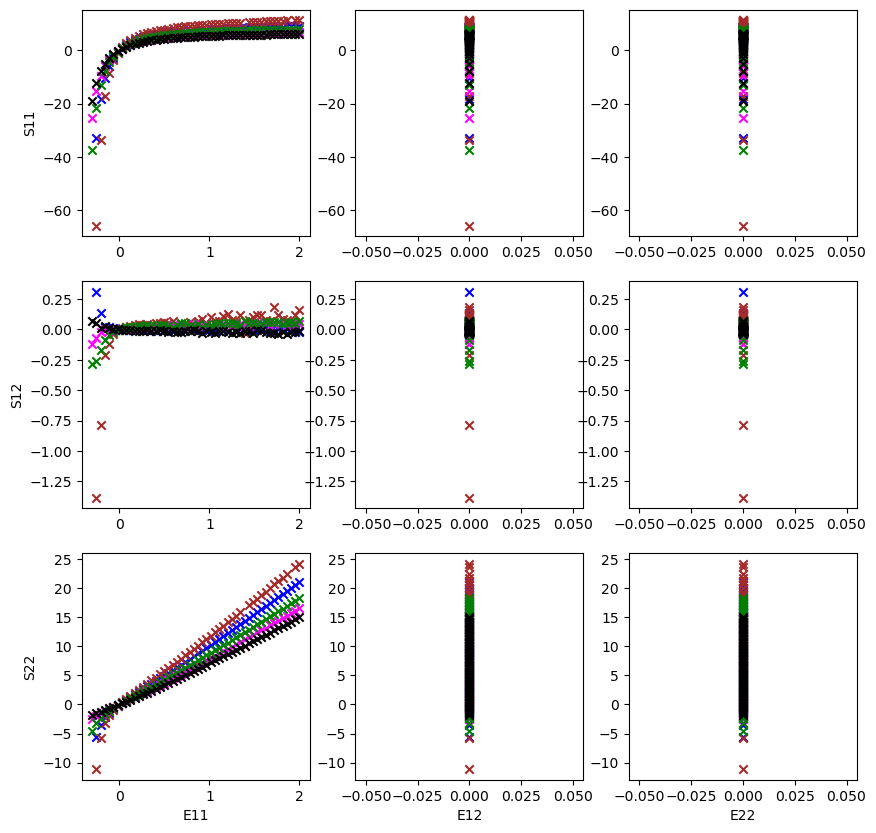

In [105]:
rows = 3
cols = 3
fig, ax = plt.subplots(nrows = rows, ncols = cols)
xlabels = ['E11', 'E12', 'E22']
ylabels = ['S11', 'S12', 'S22']
# colors = [['blue', 'brown', 'magenta'],
#           ['green', 'black', 'green'],
#           ['magenta', 'brown', 'blue']]
colors = ['blue', 'brown', 'magenta', 'green', 'black']
vfrac = dataset['vol_frac'].unique()

for i in range(len(vfrac)):
    for row in range(rows):
        ax[row][0].set_ylabel(ylabels[row])
        for col in range(cols):
            df = dataset[dataset['vol_frac'] == vfrac[i]]
            x = df[xlabels[col]]
            y = df[ylabels[row]]
            
            ax[row][col].scatter(x, y, marker = "x", color = colors[i])
            if row+1 == rows:
                ax[row][col].set_xlabel(xlabels[col])
fig.set_size_inches(10, 10)
plt.show()

